In [1]:
import pandas as pd
import numpy as np
import requests
import zipfile
import io
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip"
print("Скачивание архива.")
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
print("Архив загружен.")

with zip_file.open('datatraining.txt') as f:
    df = pd.read_csv(f)

df.head()

Скачивание архива.
Архив загружен.


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Размер данных: (8143, 7)
Типы данных:
date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object
Основная статистика:


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Пропуски в данных:
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
Распределение целевой переменной (Occupancy):
Occupancy
0    6414
1    1729
Name: count, dtype: int64


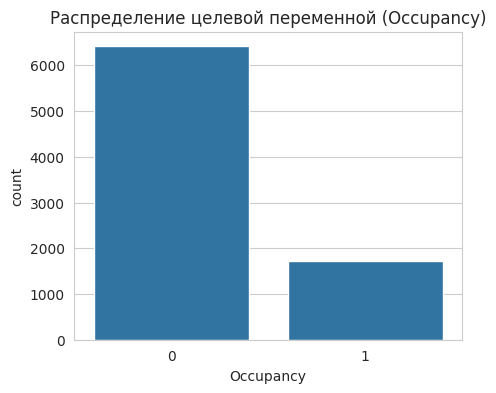

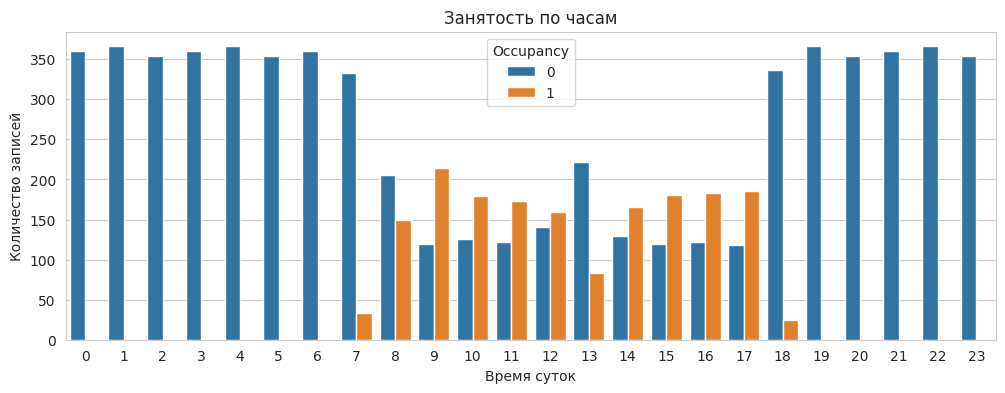

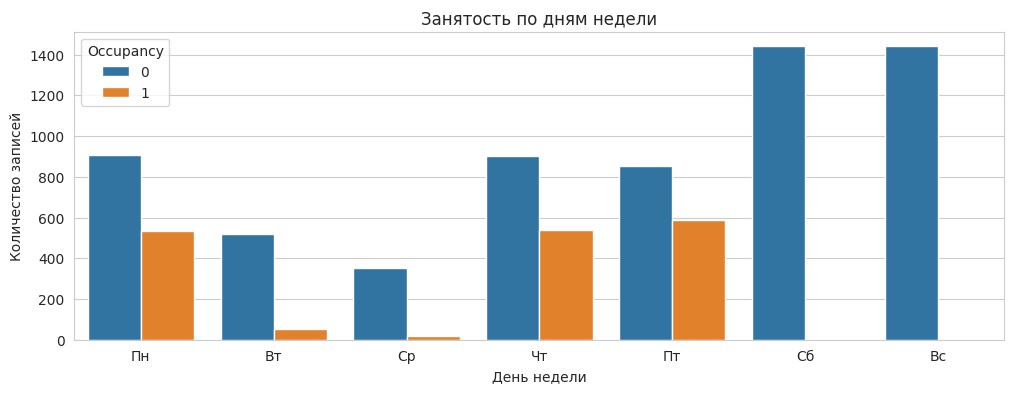

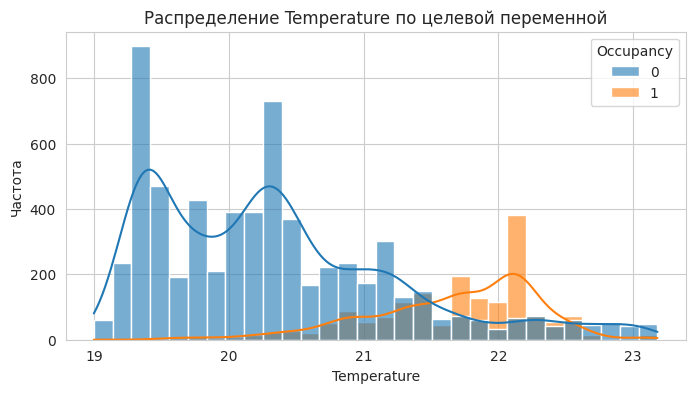

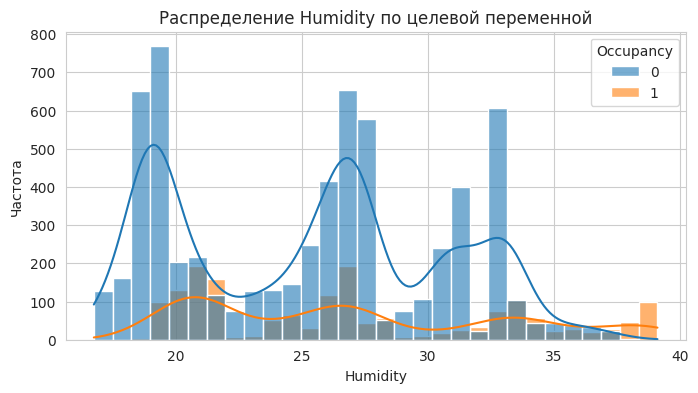

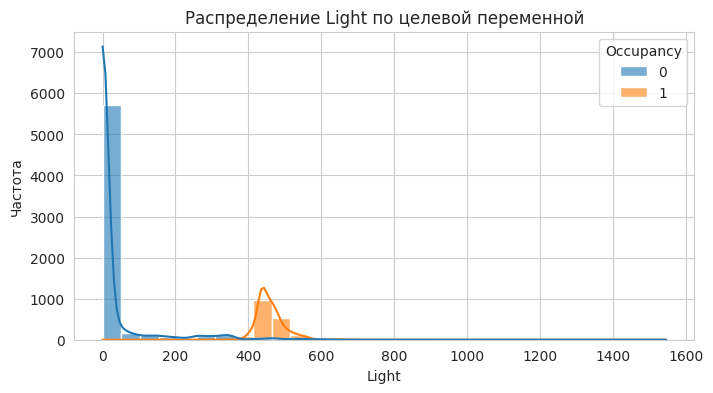

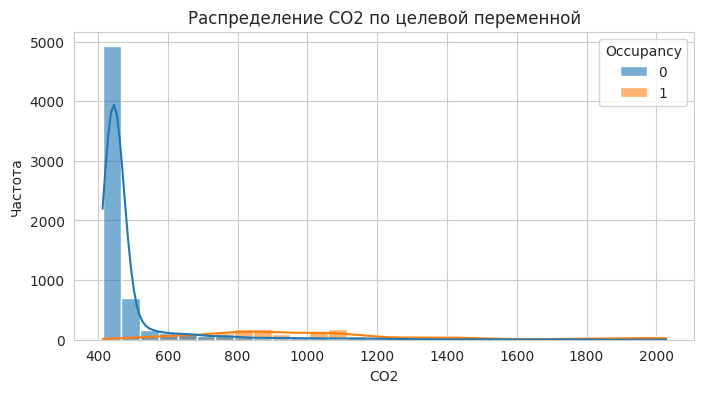

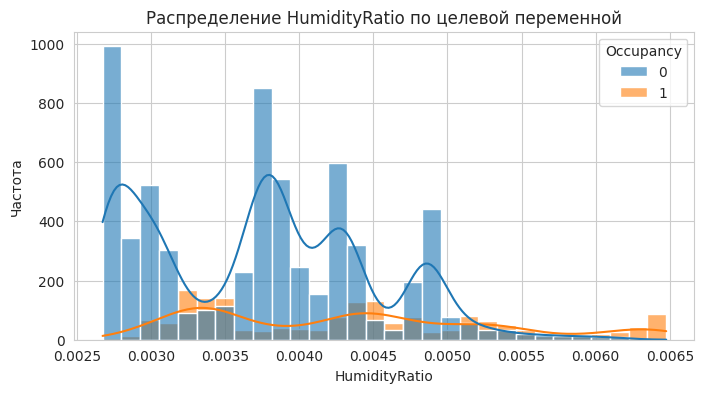

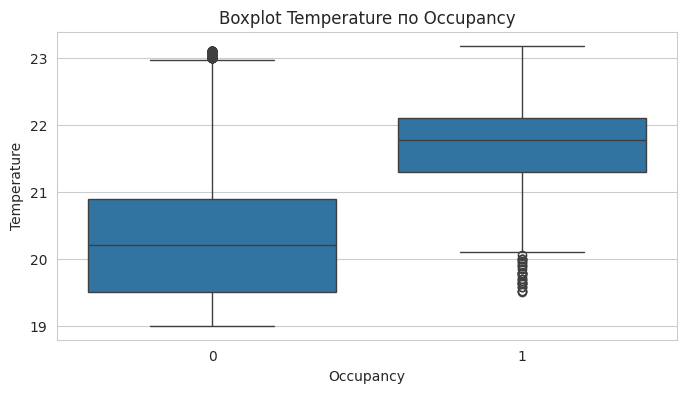

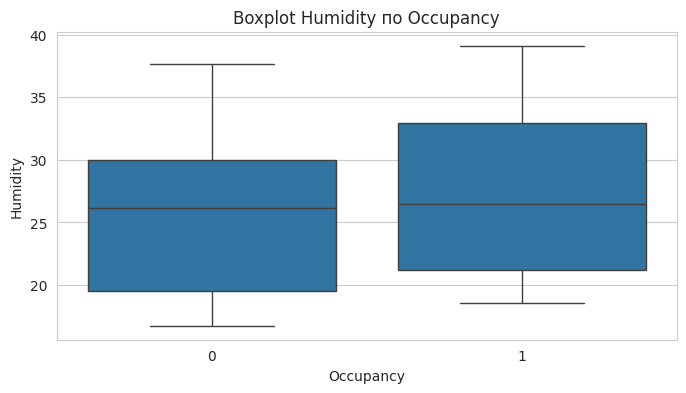

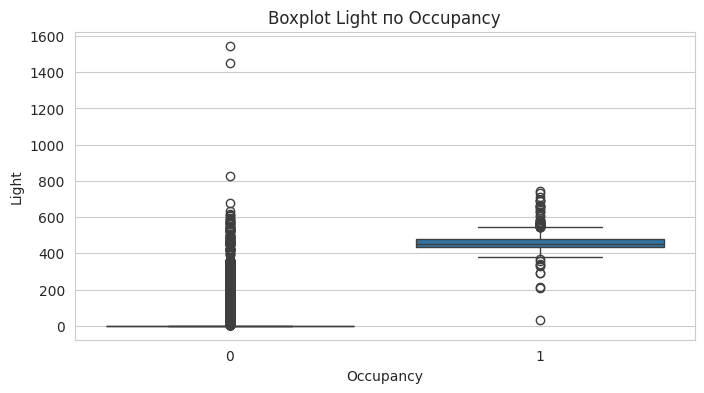

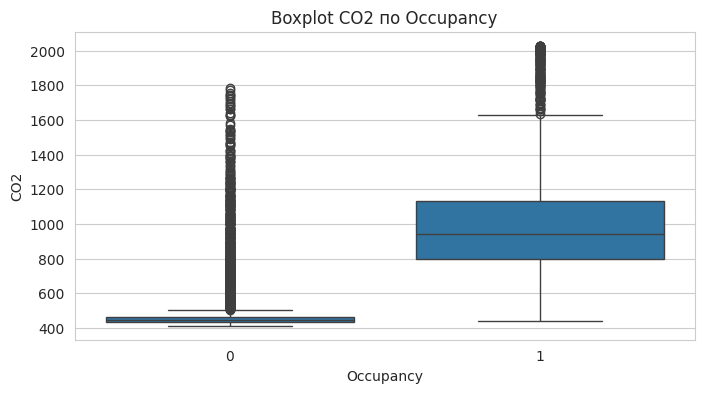

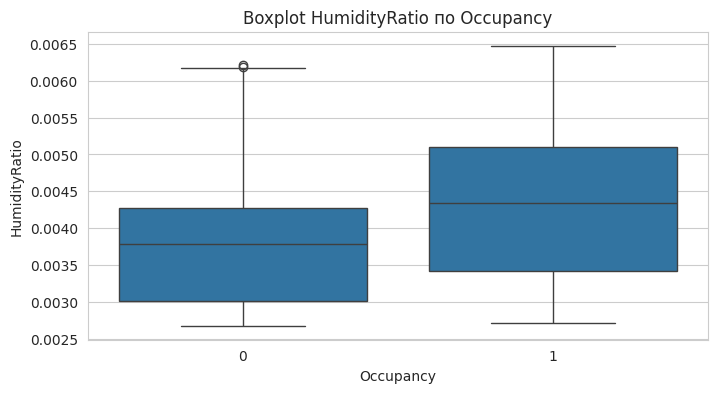

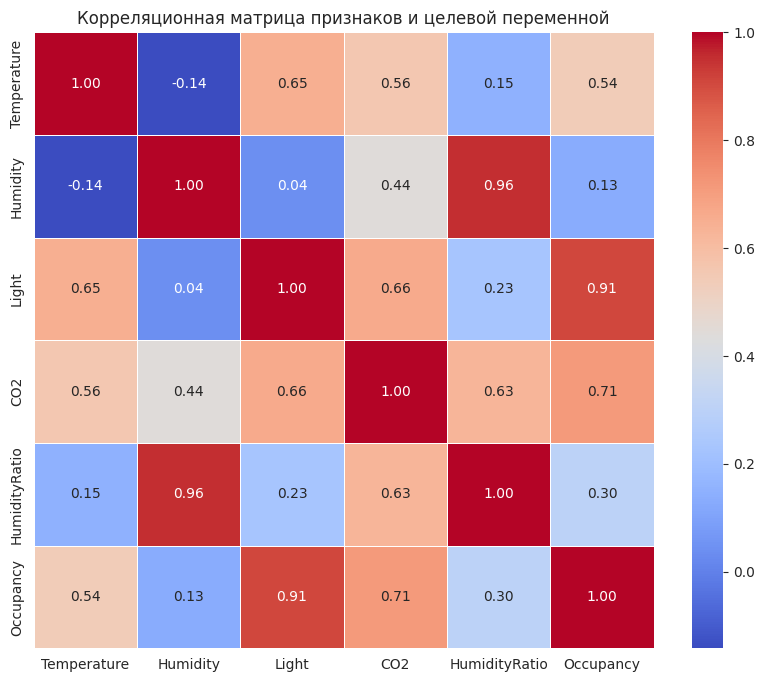

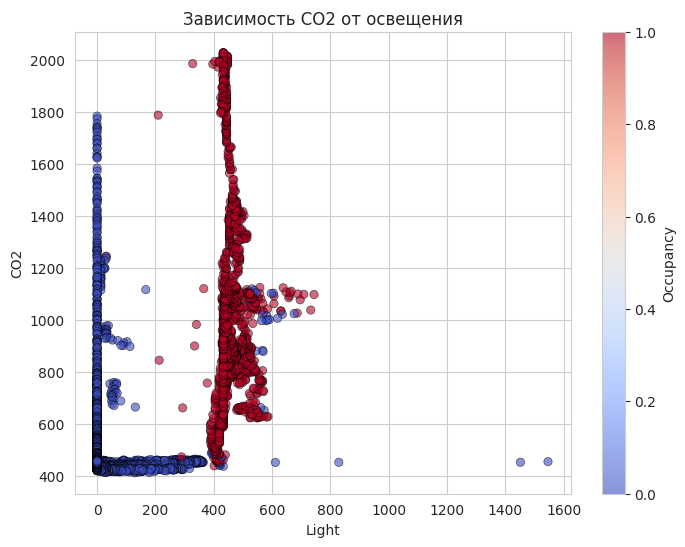

In [3]:
sns.set_style('whitegrid')

print("Размер данных:", df.shape)
print("Типы данных:")
print(df.dtypes)
print("Основная статистика:")
display(df.describe())

print("Пропуски в данных:")
print(df.isnull().sum())

print("Распределение целевой переменной (Occupancy):")
print(df['Occupancy'].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x='Occupancy', data=df)
plt.title('Распределение целевой переменной (Occupancy)')
plt.show()

df['date'] = pd.to_datetime(df['date'])
df['Hour'] = df['date'].dt.hour
df['DayOfWeek'] = df['date'].dt.dayofweek

plt.figure(figsize=(12,4))
sns.countplot(x='Hour', hue='Occupancy', data=df)
plt.title('Занятость по часам')
plt.xlabel('Время суток')
plt.ylabel('Количество записей')
plt.legend(title='Occupancy')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='DayOfWeek', hue='Occupancy', data=df)
plt.title('Занятость по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество записей')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.legend(title='Occupancy')
plt.show()

features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=feature, hue='Occupancy', bins=30, kde=True, alpha=0.6)
    plt.title(f'Распределение {feature} по целевой переменной')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Occupancy', y=feature, data=df)
    plt.title(f'Boxplot {feature} по Occupancy')
    plt.show()

plt.figure(figsize=(10,8))
corr = df[features + ['Occupancy']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков и целевой переменной')
plt.show()

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Light'], df['CO2'], c=df['Occupancy'], cmap='coolwarm', alpha=0.6, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Occupancy')
plt.xlabel('Light')
plt.ylabel('CO2')
plt.title('Зависимость CO2 от освещения')
plt.show()

df = df.drop(['DayOfWeek'], axis=1)

In [4]:
X = df.drop(['Occupancy', 'date'], axis = 1)
y = df['Occupancy']

df = df.drop(['Occupancy', 'Hour'], axis = 1)

In [5]:
indices = np.arange(len(df))
indices_1, indices_2 = train_test_split(indices, test_size=0.5, random_state=42, stratify=y)

df_producer1 = df.iloc[indices_1].copy()
df_producer2 = df.iloc[indices_2].copy()

df_producer1.to_csv('data1.csv', index=False)
df_producer2.to_csv('data2.csv', index=False)

In [6]:
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Hour
1,23.18,27.2720,426.0,721.25,0.004793,17
2,23.15,27.2675,429.5,714.00,0.004783,17
3,23.15,27.2450,426.0,713.50,0.004779,17
4,23.15,27.2000,426.0,708.25,0.004772,17
5,23.10,27.2000,426.0,704.50,0.004757,17


In [7]:
y.head()

,Occupancy
1,1
2,1
3,1
4,1
5,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

X_train = X_train_scaled
X_test = X_test_scaled

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.9957028852056476
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1283
           1       0.98      1.00      0.99       346

    accuracy                           1.00      1629
   macro avg       0.99      1.00      0.99      1629
weighted avg       1.00      1.00      1.00      1629



In [11]:
from google.colab import files
files.download('data1.csv')
files.download('data2.csv')
files.download('model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>